# Data Visualisation with matplotlib:

matplotlib is a 2D plotting library for Python and NumPy (Python's numerical mathematical extension). It is the most popular Python library for 2D graphics, with its main aim being <i>to make easy things easy and hard things possible.</i> With just a few lines of code, one can generate line graphs, histograms, bar charts, and scatterplots, amongst many other types of graph.

I am going to be focusing on the <i>pyplot</i> interface. <i>pyplot</i> provides a convenient interface to the object-oriented plotting library of matplotlib and is based quite closely on MATLAB. It is a collection of command style functions, each of which make some change to the figure (e.g. creation of a figure, plotting of lines, addition of labels).

## matplotlib.pyplot

<b>Before we start:</b> If you are ever plotting with matplotlib using Jupyter Notebook, you must execute <i>%matplotlib</i> before executing any code so that the Jupyter kernel is set up to display the output of matplotlib code in the notebook's cells. To have the output displayed <i>inline</i> with the notebook (recommended) below the code cell that produced it (and also store the resulting plot in the cell), execute the following command:

In [2]:
%matplotlib inline

Let's start with a basic example of plotting with <i>pyplot</i>:

- Firstly, import the <i>pyplot</i> module as follows:

In [3]:
import matplotlib.pyplot as plt

> <b>Note:</b> The pyplot module can be imported as any name but the convention you will see used in most publications and online materials is to name it <b>plt</b>.

- Similar to the methods of the <i>bokeh.plotting</i> interface, the <i>plot()</i> method in <i>pyplot</i> takes in as parameters lists of x and y co-ordinates; however, a difference between the two interfaces lies in the fact that in <i>pyplot</i>, for each pair of x and y co-ordinates, there exists an optional third formatting parameter. This parameter is passed in as a string in the general form of '(colour)(shape)'. 

For example, if we wish to plot green squares, we pass in the parameter 'gs' after the pair of x and y co-ordinates that the squares are representing, 'g' for 'green' and 's' for squares. See below:

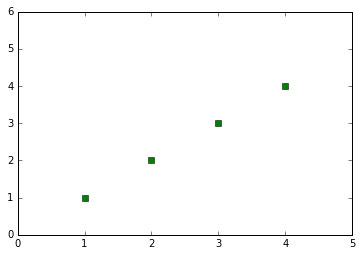

In [4]:
#Define the x and y co-ordinates (arbitrary numbers in this case)
x = [1,2,3,4]
y = [1,2,3,4]

#Plot the markers in the positions defined above in the given format
plt.plot(x, y, 'gs')

#Set the range of the x and y axes (x and y pairs). This is useful to ensure none of the markers are cut off. 
plt.axis([0,5,0,6])

#Display the plot
plt.show()

There are many different styles and colors that you can apply to the markers through this third parameter, which are detailed here: http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot
> <b>Note:</b> The default means of representing data when no type of marker is specified is a line.

<function matplotlib.pyplot.show>

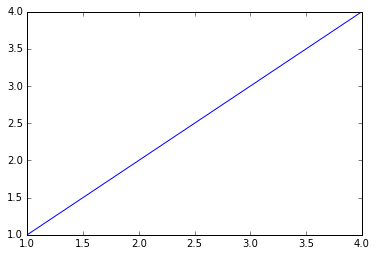

In [5]:
#Plotting with no third style parameter
plt.plot(x,y)
plt.show

The <i>plot()</i> function accepts as many x, y pairs (plus optional third style parameter with each pair) as the user wants. As you may guess, doing so results in numerous sets of markers on the same plot.

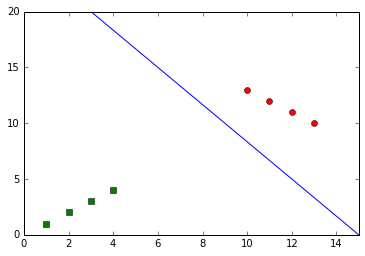

In [6]:
#Define data
x1 = [1,2,3,4]
y1 = [1,2,3,4]

x2 = [10,11,12,13]
y2 = [13,12,11,10]

x3 = [3,6,9,12,15]
y3 = [20,15,10,5,0]

#Plot multiple sets of markers
plt.plot(x1, y1, 'gs', x2, y2, 'ro', x3, y3)

#Set the x and y range
plt.axis([0,15,0,20])

#Display the plot
plt.show()

Generally when using matplotlib, it's easier to use <i>numpy</i> arrays as opposed to lists. First, you will have to make the necessary import:

In [7]:
import numpy as np

Once you have done this, you can use numpy's <i>arange()</i> function to return an array of values in a given range. 

In [8]:
# Returns an array which starts at 0, ends on the number returned just before 8, and is split into intervals of length 0.5 
x = np.arange(0., 8., 0.5)

Then plot a few variations of the above array along with a few different formatting styles:

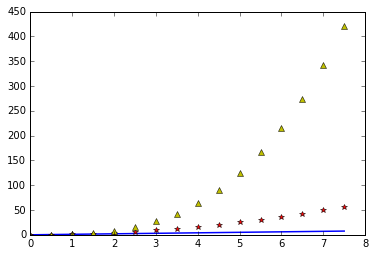

In [9]:
plt.plot(x, x, 'b-', x, x**2, 'r*', x, x**3, 'y^', linewidth=1.5)
plt.show()

### Reading information from a file with <i>matplotlib</i>:

Up until now we have been defining our x and y co-ordinates by manually typing the values into lists at the start of our code. This has really just been for illustrative purposes, but in real life we will obviously need to apply the above methods to more meaningful data. It's slow and inefficient to type in all of our values to a list; so what if we read them in from a file instead?

Say we have a text file called <i>sample.txt</i> which is 8 lines long; each line contains one of our x-values, a comma, and one of our y-values, with no spaces in between. 

2,4

1,6

2,6

2,8

2,4

5,8

3,7

4,6

How would we extract the correct information from this file and add it to the list of x or y values?

Once we have imported <i>pyplot</i>, we will set up two empty lists, one for the x co-ordinates and another for the y co-ordinates:

In [10]:
xs = []
ys = []

We will then open the file using Python's <i>open()</i> function. The first parameter that this function accepts is the name of the file you want to open, passed in as a string. The second parameter is one of the following:
> <b>'r':</b> For when you want to <i>read</i> the file.

> <b>'w':</b> For when you want to <i>write</i> to the file.

> <b>'a':</b> For when you want to <i>append</i> to the file.

<b>Note:</b> The difference between the <i>write</i> and <i>append</i> arguments is that <i>write</i> replaces the current contents of the specified file while <i>append</i> adds to the end of them.

In this case, we want to read from the file so we will be using 'r'. We will assign this opened file, ready to be read from, to a variable:

In [11]:
filehandle = open('C:\Users\Niamh\Desktop\Programs\sample.txt', 'r')

Now we will set up a <i>for loop</i> which will go through each line of the file specified above, and then use our knowledge of indexing to sort the two values in each line in to the list of x co-ordinates or y co-ordinates given that a comma separates them.

In [12]:
#Go through each line
for line in filehandle:
    #Append item in 0th position of the line (x-value) to the list of x co-ordinates. Convert it to an int since it is a string
    xs.append(int(line[0]))
    #Append item in 2nd position of the line (y-value, skipping the comma) to the list of y co-ordinates and convert to int.
    ys.append(int(line[2]))

Before we proceed to plotting, let's check the correctness of our code by printing out the lists of x and y co-ordinates.

In [13]:
print xs
print ys

[2, 1, 2, 2, 2, 5, 3, 4]
[4, 6, 6, 8, 4, 8, 7, 6]


These match up with the values that were placed in <i>sample.txt</i> so we now know that everything has worked properly above.

As we have done in previous examples, we can now simply plot these points using the <i>plot()</i> method from <i>pyplot</i>, adding a third formatting parameter to make the co-ordinates appear as red circles:

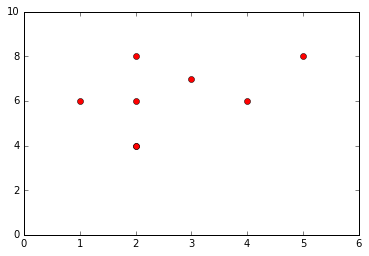

In [14]:
plt.plot(xs, ys, 'ro')
plt.axis([0,6,0,10])
plt.show()

As mentioned earlier, if we do not specify any third formatting parameter then the default means of representing the co-ordinates is a line. Lines have many attributes (see here for the full list: http://matplotlib.org/api/lines_api.html#matplotlib.lines.Line2D) which can be set in a few different ways, such as the following:

- Using keywords args:

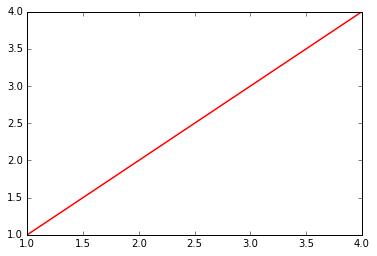

In [15]:
plt.plot([1,2,3,4], [1,2,3,4], color='r', linewidth=1.5)

> <b>Note:</b> Keywords args must always be placed after x and y parameters.

- Using the <i>setp()</i> command to set multiple properties on a list of lines.

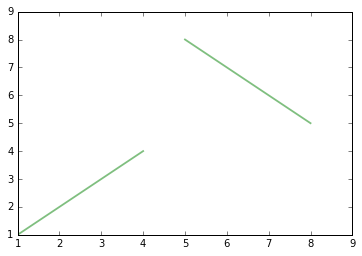

In [16]:
lines = plt.plot([1,2,3,4],[1,2,3,4],[5,6,7,8],[8,7,6,5])
plt.setp(lines, linewidth=1.8, color='g', alpha=0.5)
plt.axis([1,9,1,9])
plt.show()

### Adding some text to our plots:

So far we have been creating a variety of different plots, however none have had any text element. Having text on plots is very important, whether it be to provide a title, to label the x and y axes, to create a legend, or to highlight a point of interest. Text serves the purpose of clarifying ambiguities, explaining what different things mean, and emphasising important points.

As with lines, text objects have many attributes which can be set by including the appopriate <i>keywords arguments</i> in the function that adds the text to the plot. See here for the full list of attributes: http://matplotlib.org/api/text_api.html#matplotlib.text.Text

The following are a few examples of different ways of adding text to your plots using matplotlib:

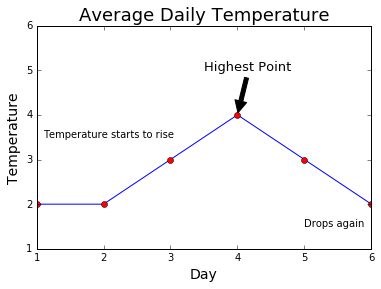

In [17]:
plt.plot([1,2,3,4,5,6],[2,2,3,4,3,2],[1,2,3,4,5,6],[2,2,3,4,3,2], 'ro')
plt.axis([1,6,1,6])

#Add a title
plt.title('Average Daily Temperature', fontsize=18)
#Add a label for the x-axis
plt.xlabel('Day', fontsize=14)
#Add a label for the y-axis
plt.ylabel('Temperature', fontsize=14)
#Add a comment about a particular part of the plot
plt.text(1.1, 3.5, 'Temperature starts to rise')
#Add another comment
plt.text(5, 1.5, 'Drops again')
#Point out a point of interest in the plot
plt.annotate('Highest Point', xy=(4,4), xytext=(3.5,5), arrowprops=dict(facecolor='black', shrink=0.05), fontsize=13)

plt.show()

Another means of visually representing data in <i>matplotlib</i> is using bar charts. These can be created easily as follows:

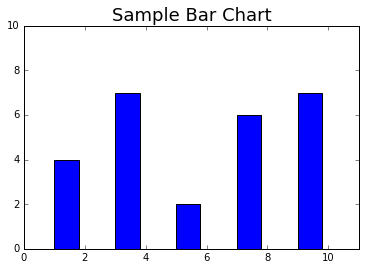

In [18]:
x = [1,3,5,7,9]
y = [4,7,2,6,7]

plt.bar(x, y)
plt.axis([0,11,0,10])
plt.title("Sample Bar Chart", fontsize=18)

plt.show()

If we want to plot more than one set of bars, it is important that we create a means of distinguishing between them. This can be achieved by making them different colors and including a legend which tells the reader which bars are which.

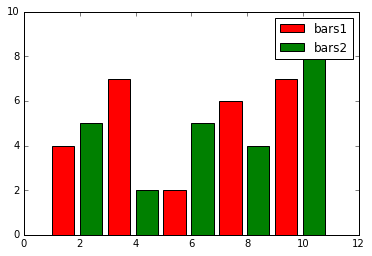

In [19]:
x = [1,3,5,7,9]
y = [4,7,2,6,7]

x2 = [2,4,6,8,10]
y2 = [5,2,5,4,9]

plt.bar(x, y, label="bars1", color="r")
plt.bar(x2, y2, label="bars2", color="g")

plt.axis([0,12,0,10])

plt.legend()

plt.show()

Hopefully this notebook has given an insightful overview of the matplotlib library. 

For more information on other Python data visualisation libraries and their application, see the other notebooks in this set.